<a href="https://colab.research.google.com/github/jayaemekar/CSCI-611-AppiledMachineLearning/blob/main/EXAM_TITANIC_NextSteps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXAM - Spring 2021 - TITANIC
##This Notebook is the second in the set*. The goal here is to Build and Evaluate

*[Assumes you have complete stage 1 (imports, loads, explore data); For stage 2 goals, you should continue explore model generation, exploration, and selection, at your own pace].




IMPORT LIBRARIES

In [48]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# data preprocessing
from sklearn.preprocessing import LabelEncoder

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# Remove warnings
import warnings
warnings.filterwarnings('ignore')


#Load Data 
1. Load the data into pandas dataframe
2. Print the first few rows of data

In [49]:
#Load the data
titanic = pd.read_csv('/content/titanic_train.csv')
#Print the first 6 rows of data
titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


#Data Exploration/Analysis
1. Print the info for the data
2. Describe the data

In [50]:
# Print the info for the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
# describe the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#CLEAN DATA FOR PROCESSING

Below are the missing values from each column

In [52]:
#Below are the missing values from each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage missing values from titanic data for each table

In [53]:
#Percentage missing values from titanic data for each table
total = titanic.isnull().sum().sort_values(ascending=False)
percent = titanic.isnull().sum()/titanic.isnull().count()*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data.head(15)

,Total,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


From above data we can analyze that
1. The Embarked feature has only 2 missing values, which can easily be filled. 
2. 'Age' feature, which has 177 missing values.It will be much more tricky, to deal with the Age feature.
3. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.


Also, Looking at the titanic data The features contribute to a high survival rate are everything except ‘PassengerId’, ‘Ticket’ and ‘Name’.

#FInd releation between different columns

##Age vs Sex

This graph is to check the relaation between Age and Sex Column with male and female

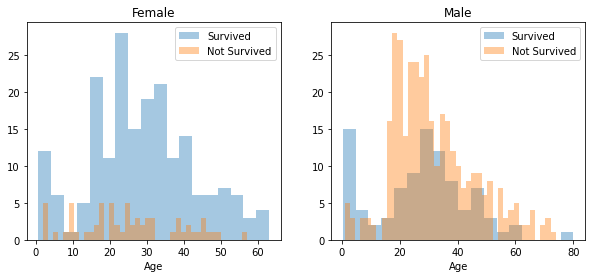

In [54]:
# This graph is to check the relaation between Age and Sex Column with male and female
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
female = titanic[titanic['Sex']=='female']
male = titanic[titanic['Sex']=='male']
ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=18, label = 'Survived', ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=40, label = 'Not Survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=18, label = 'Survived', ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=40, label = 'Not Survived', ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

From above graph it is more clear that 
1. Females are more survived than males
2. Females betwen age group 14 to 40 are likely to survive more
3. Males between age group 18 to 30 are likely to survive

Look at survival rate by sex

In [55]:
#Look at survival rate by sex
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


1. For men have a high probability of survival when they are between 18 and 30 years old.
2. For women the survival chances are higher between 14 and 40.


##Embarked, Pclass,SibSp and Sex

Visualize the count of survivors for columns  'sex', 'pclass', 'sibsp' and 'embarked'

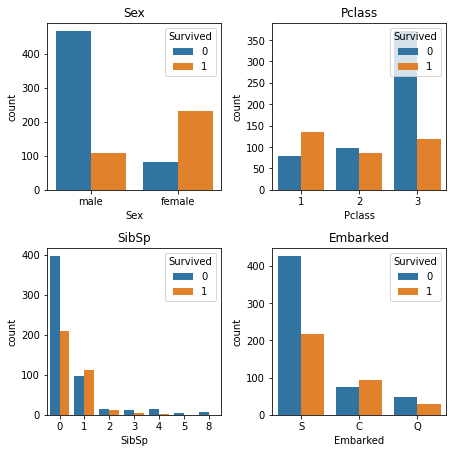

In [56]:
# Visualize the count of survivors for columns  'sex', 'pclass', 'sibsp' and 'embarked'
n_rows = 2
n_cols = 2
cols = ['Sex', 'Pclass', 'SibSp', 'Embarked']
# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(titanic[cols[i]], hue=titanic["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Survived", loc='upper right') 
        
plt.tight_layout()  

From above countplot below are the observations:

1. Females are most likely to survive from the chart sex.
2. Third class is most likely to not survive by chart pclass.
3. If you have 0 siblings or spouses on board, you are not likely to survive according to chart sibsp.
4. If you embarked from Southampton (S), you are not likely to survive according to the embarked chart.

In [57]:
#Look at survival rate by sex and class
titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


From above table
1. Passengers from first class are likely to survive more.
2. Females from first class is having highest survival rate..
3. Males from third class is having lowest survival rate

Below I plotted the graph for the same pivot table

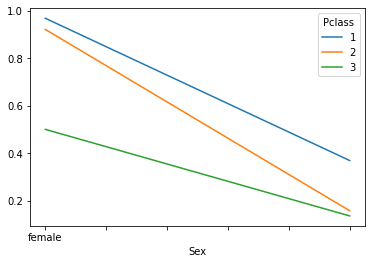

In [58]:
#Look at survival rate by sex and class visually
titanic.pivot_table('Survived', index='Sex', columns='Pclass').plot()

Bar Graph to show surrival rate for each class

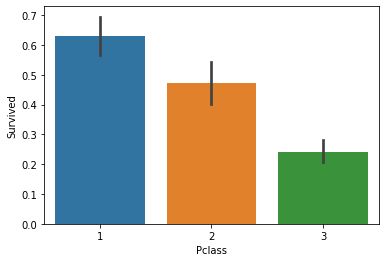

In [59]:
#Plot the survival rate of each class.
sns.barplot(x='Pclass', y='Survived', data=titanic)

  Below pivot table and graph shows survival date by sex age and class.
  I have splitted the age in the group (0,18) and (19,80)

In [60]:
#Look at survival rate by sex, age and class
age = pd.cut(titanic['Age'], [0, 18, 80])
titanic.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

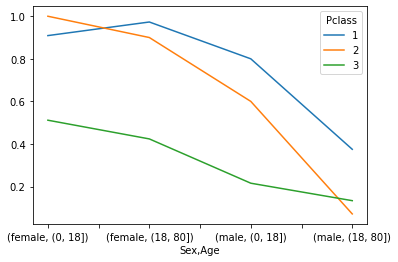

In [61]:
titanic.pivot_table('Survived', ['Sex', age], 'Pclass').plot()

There is high probability that a person in pclass 3 will not survive.

##SibSp and Parch

SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic.

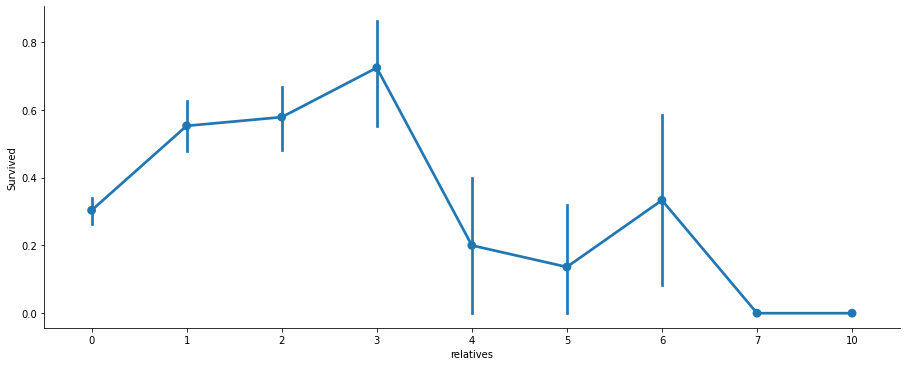

In [62]:
titanic['relatives'] = titanic['SibSp'] + titanic['Parch']
titanic.loc[titanic['relatives'] > 0, 'not_alone'] = 0
titanic.loc[titanic['relatives'] == 0, 'not_alone'] = 1
titanic['not_alone'] = titanic['not_alone'].astype(int)
titanic['not_alone'].value_counts()
axes = sns.factorplot('relatives','Survived', 
                      data=titanic, aspect = 2.5, )

It has high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

## Pclass and Fare

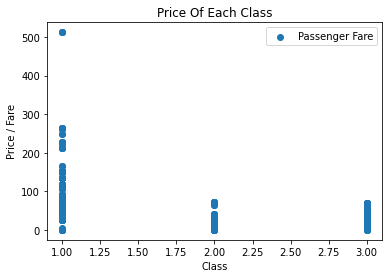

In [63]:
#Plot the Prices Paid Of Each Class
plt.scatter( titanic['Pclass'], titanic['Fare'],label='Passenger Fare')
plt.xlabel ('Class')
plt.ylabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

This graph shows the passenger fare for class 1, 2 and 3 

## Pclass and survival by gender

The below graph shows the Survival by gender and passenger class

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

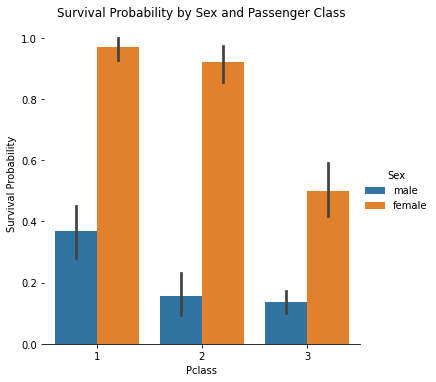

In [64]:
# Survival by gender and passenger class
graph = sns.factorplot(x = 'Pclass', y = 'Survived',kind = 'bar',hue = 'Sex', data = titanic)
graph.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

## Embarked and Survival 

In [65]:
# Value counts of the Embarked column 
titanic['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Two missing values in the Embarked column

In [66]:
# Mean of survival by point of embarkation
meanValue = titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean()
meanValue.sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Below graph shows the Survival probablity by Embarkation

Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

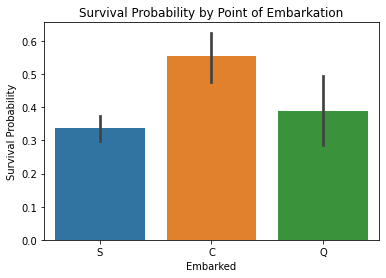

In [67]:
sns.barplot(x = 'Embarked', y ='Survived', data = titanic)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

## Embarked and Pclass

Lets combine Embraked feature with pclass to analyze more

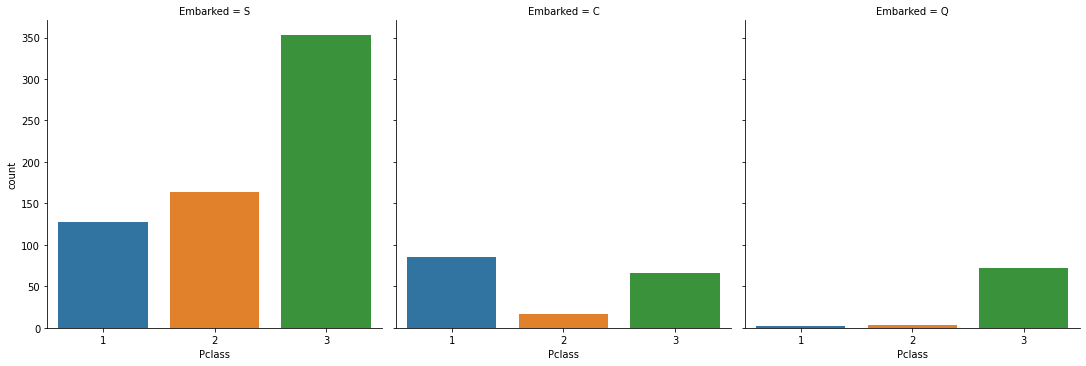

In [68]:
sns.factorplot('Pclass', col = 'Embarked', data = titanic, kind = 'count')

## Pclass, Embraked, Sex
Now combine Pclass, Embraked feature with Sex

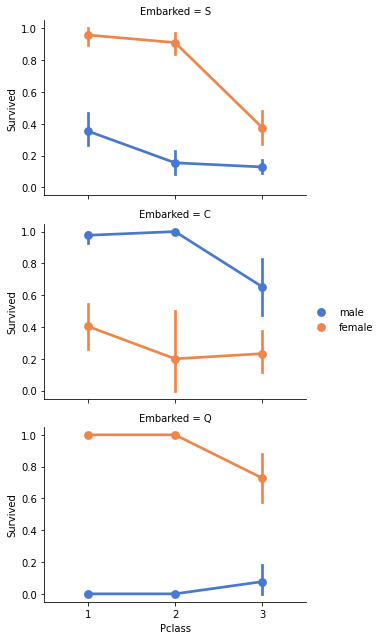

In [69]:
# Survival probability by all categorical variables
grid = sns.FacetGrid(titanic, row = 'Embarked',  aspect = 1.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'muted')
grid.add_legend()

## Heatmap to find relation between multiple column

HeatMap for the survival rate against features.
Fare seems to be the only feature that has a substantial correlation with survival

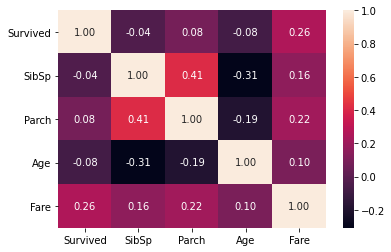

In [70]:
sns.heatmap(titanic[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f')

# Data Preprocessing

I will drop Passenger Id, Name, Ticket, Cabin because it doesn't contribute the persons survival probability and the redundant columns that are non-numerical and remove rows with missing values.

## Cleaning the data by dropping the unnessary columns

In [71]:
# Drop the columns
titanic = titanic.drop([ 'Name', 'Ticket', 'Cabin','Pclass','PassengerId'], axis=1)

#Remove the rows with missing values
titanic = titanic.dropna(subset =['Embarked', 'Age'])

##Get new Shape of dataset

In [72]:
#Count the NEW number of rows and columns in the data set
titanic.shape

(712, 9)

## Data types for columns

In [73]:
titanic.dtypes

Survived       int64
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
relatives      int64
not_alone      int64
dtype: object

##Print the unique values in the columns

In [74]:
#Print the unique values in the columns
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


#Encoding categorical data values (Transforming object data types to integers)


In [75]:
#Encoding categorical data values (Transforming object data types to integers)
labelencoder = LabelEncoder()

titanic.iloc[:,1]= labelencoder.fit_transform(titanic.iloc[:,1].values) #Encode sex column
titanic.iloc[:,6]= labelencoder.fit_transform(titanic.iloc[:,6].values) #Encode embarked

#Print the NEW unique values in the columns
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

[1 0]
[2 0 1]


#MODEL BUILDING

## Split the data

In [76]:
#Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values 

Split the data again, this time into 80% training (X_train and Y_train) and 20% testing (X_test and Y_test) data sets.

In [77]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [78]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Logistic Regression

In [79]:
#Using Logistic Regression Algorithm to the Training Set
log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)
print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
# Constructing the confusion matrix.
cm = confusion_matrix(Y_test, log.predict(X_test)) 
print('Confusion Matrix :\n', cm)
TN, FP, FN, TP = confusion_matrix(Y_test, log.predict(X_test)).ravel()
print('Logistic Regression Testing Accuracy = '  ,(TP + TN) / (TP + TN + FN + FP))

Logistic Regression Training Accuracy: 0.7838312829525483
Confusion Matrix :
 [[69 13]
 [21 40]]
Logistic Regression Testing Accuracy =  0.7622377622377622


## KNeighborsClassifier

In [80]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

print('K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))

# Constructing the confusion matrix.
cm = confusion_matrix(Y_test, knn.predict(X_test)) 
print('Confusion Matrix :\n', cm)
TN, FP, FN, TP = confusion_matrix(Y_test, knn.predict(X_test)).ravel()
print('KNeighborsClassifier Testing Accuracy = '  ,(TP + TN) / (TP + TN + FN + FP))

K Nearest Neighbor Training Accuracy: 0.843585237258348
Confusion Matrix :
 [[70 12]
 [19 42]]
KNeighborsClassifier Testing Accuracy =  0.7832167832167832


## Linear Support Vector Machine 

In [81]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, Y_train)

print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))

# Constructing the confusion matrix.
cm = confusion_matrix(Y_test, svc_lin.predict(X_test)) 
print('Confusion Matrix :\n', cm)
TN, FP, FN, TP = confusion_matrix(Y_test, svc_lin.predict(X_test)).ravel()
print('Support Vector Machine (Linear Classifier) Testing Accuracy = '  ,(TP + TN) / (TP + TN + FN + FP))

Support Vector Machine (Linear Classifier) Training Accuracy: 0.7768014059753954
Confusion Matrix :
 [[70 12]
 [18 43]]
Support Vector Machine (Linear Classifier) Testing Accuracy =  0.7902097902097902


## RBF Support Vector Machine

In [82]:
#Using SVC method of svm class to use Kernel SVM Algorithm
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, Y_train)

print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))

# Constructing the confusion matrix.
cm = confusion_matrix(Y_test, svc_rbf.predict(X_test)) 
print('Confusion Matrix :\n', cm)
TN, FP, FN, TP = confusion_matrix(Y_test, svc_rbf.predict(X_test)).ravel()
print('Support Vector Machine (RBF Classifier) Testing Accuracy = '  ,(TP + TN) / (TP + TN + FN + FP))

Support Vector Machine (RBF Classifier) Training Accuracy: 0.8347978910369068
Confusion Matrix :
 [[70 12]
 [18 43]]
Support Vector Machine (RBF Classifier) Testing Accuracy =  0.7902097902097902


## Naïve Bayes Algorithm

In [83]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
gauss = GaussianNB()
gauss.fit(X_train, Y_train)

print('Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))

# Constructing the confusion matrix.
cm = confusion_matrix(Y_test, gauss.predict(X_test)) 
print('Confusion Matrix :\n', cm)
TN, FP, FN, TP = confusion_matrix(Y_test, gauss.predict(X_test)).ravel()
print('Gaussian Naive Bayes Testing Accuracy = '  ,(TP + TN) / (TP + TN + FN + FP))

Gaussian Naive Bayes Training Accuracy: 0.804920913884007
Confusion Matrix :
 [[68 14]
 [21 40]]
Gaussian Naive Bayes Testing Accuracy =  0.7552447552447552


##DecisionTreeClassifier 

In [84]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, Y_train)

print('Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))

# Constructing the confusion matrix.
cm = confusion_matrix(Y_test, tree.predict(X_test)) 
print('Confusion Matrix :\n', cm)
TN, FP, FN, TP = confusion_matrix(Y_test, tree.predict(X_test)).ravel()
print('Decision Tree Classifier Testing Accuracy = '  ,(TP + TN) / (TP + TN + FN + FP))

Decision Tree Classifier Training Accuracy: 0.9929701230228472
Confusion Matrix :
 [[66 16]
 [17 44]]
Decision Tree Classifier Testing Accuracy =  0.7692307692307693


##RandomForestClassifier 

In [85]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

print('Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

# Constructing the confusion matrix.
cm = confusion_matrix(Y_test, forest.predict(X_test)) 
print('Confusion Matrix :\n', cm)
TN, FP, FN, TP = confusion_matrix(Y_test, forest.predict(X_test)).ravel()
print('Random Forest Classifier Testing Accuracy = ' ,(TP + TN) / (TP + TN + FN + FP))

Random Forest Classifier Training Accuracy: 0.9929701230228472
Confusion Matrix :
 [[68 14]
 [15 46]]
Random Forest Classifier Testing Accuracy =  0.7972027972027972


##Stochastic Gradient Descent

In [86]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)

print('Stochastic Gradient Descent Training Accuracy:', sgd.score(X_train, Y_train))

# Constructing the confusion matrix.
cm = confusion_matrix(Y_test, sgd.predict(X_test)) 
print('Confusion Matrix :\n', cm)
TN, FP, FN, TP = confusion_matrix(Y_test, sgd.predict(X_test)).ravel()
print('Stochastic Gradient Descent Classifier Testing Accuracy = '  ,(TP + TN) / (TP + TN + FN + FP))

Stochastic Gradient Descent Training Accuracy: 0.7539543057996485
Confusion Matrix :
 [[75  7]
 [32 29]]
Stochastic Gradient Descent Classifier Testing Accuracy =  0.7272727272727273


## Gradient Boosting Classifier

In [87]:
# Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, Y_train)

print('Gradient Boosting Classifier Training Accuracy:', gbk.score(X_train, Y_train))

# Constructing the confusion matrix.
cm = confusion_matrix(Y_test, gbk.predict(X_test)) 
print('Confusion Matrix :\n', cm)
TN, FP, FN, TP = confusion_matrix(Y_test, gbk.predict(X_test)).ravel()
print('Gradient Boosting Classifier Testing Accuracy = '  ,(TP + TN) / (TP + TN + FN + FP))

Gradient Boosting Classifier Training Accuracy: 0.9050966608084359
Confusion Matrix :
 [[72 10]
 [16 45]]
Gradient Boosting Classifier Testing Accuracy =  0.8181818181818182


##Perceptron

In [88]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)

print('Perceptron Training Accuracy:', perceptron.score(X_train, Y_train))

# Constructing the confusion matrix.
cm = confusion_matrix(Y_test, perceptron.predict(X_test)) 
print('Confusion Matrix :\n', cm)
TN, FP, FN, TP = confusion_matrix(Y_test, perceptron.predict(X_test)).ravel()
print('Perceptron Testing Accuracy = '  ,(TP + TN) / (TP + TN + FN + FP))

Perceptron Training Accuracy: 0.7363796133567663
Confusion Matrix :
 [[68 14]
 [21 40]]
Perceptron Testing Accuracy =  0.7552447552447552


## MLP Classifier

In [89]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
mlp_classifier.fit(X_train, Y_train)

print('MLP Classifier Training Accuracy:', mlp_classifier.score(X_train, Y_train))

# Constructing the confusion matrix.
cm = confusion_matrix(Y_test, mlp_classifier.predict(X_test)) 
print('Confusion Matrix :\n', cm)
TN, FP, FN, TP = confusion_matrix(Y_test, mlp_classifier.predict(X_test)).ravel()
print('MLP Classifier Testing Accuracy = '  ,(TP + TN) / (TP + TN + FN + FP))

MLP Classifier Training Accuracy: 0.8945518453427065
Confusion Matrix :
 [[69 13]
 [19 42]]
MLP Classifier Testing Accuracy =  0.7762237762237763


#Feature Importance


## Get the importance of the features

In [90]:
#Get the importance of the features
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Fare,0.312
Age,0.272
Sex,0.239
relatives,0.072
SibSp,0.036
Embarked,0.036
Parch,0.034


##Visualize the importance

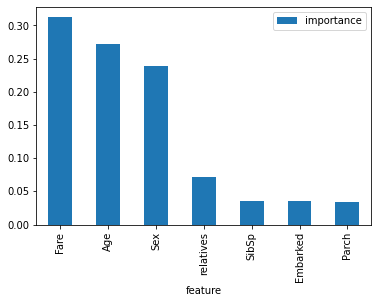

In [91]:
#Visualize the importance
importances.plot.bar()

# Calculate Survival Chances

create survival_chance variable to calculate survival chances
Sample Format : [[1,0,24,0, 0, 0, 1]]
1. pclass = 1
2. sex = 0
3. age = 24
4. sibsp = 0
5. parch = 0
6. fare = 0
7. embarked = 1

In [92]:
survival_chance = [[1,0,24,0, 1, 0, 3]]
#Print Prediction of decision tree Classifier model
pred = tree.predict(survival_chance)
if pred == 0:
  print('You are not survived !!')
else:
  print('You are survived')

You are survived


#Try to Improve on this model.

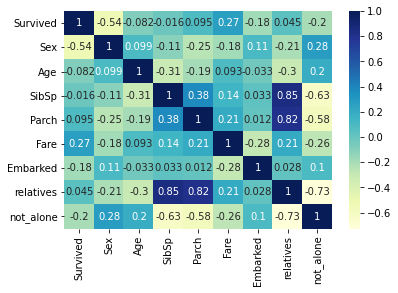

In [93]:
sns.heatmap(titanic.corr(), cmap="YlGnBu", annot=True)

#Hyperparameter Tuning

## Hyperparameters Tuning for Random Forest Classifier

In [ ]:
param_dict_forest = {
    "bootstrap": [True],
    "max_depth": [2,4,6,8,10,12],
    "min_samples_leaf": [3, 4, 5],
    "max_features": ["auto", "sqrt", "log2"],
    "n_estimators": [100, 200, 300, 1000],
    "criterion" : ["gini", "entropy"],
    "min_samples_split" : [2, 4, 8, 10, 12, 16, 18, 25, 35],
    "n_estimators": [100, 400, 700, 1000, 300, 200]
}
grid_forest = GridSearchCV(forest, param_grid=param_dict_forest, n_jobs=-1, cv=3)
grid_forest.fit(X_train, Y_train)
grid_forest.best_score_

In [ ]:
print(grid_forest.score(X_test, Y_test))
grid_forest.best_params_

In [ ]:
y_true, y_pred = Y_test , grid_forest.predict(X_test)
print('Results on the test set:')
print(confusion_matrix(y_true, y_pred))

## Hyperparameters Tuning for mlp Classifier


In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(max_iter=100)
grid_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
grid_mlp.fit(X_train, Y_train)
print(grid_mlp.best_score_)
grid_mlp.score(X_test, Y_test)

## Hyperparameters Tuning for Decision Tree Classifier


In [ ]:
param_dict_tree = {
    "criterion": ['gini', 'entropy'],
    "splitter": ["best", "random"],
    "max_depth": [2,4,6,8,10,12],
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(1,5),
    "max_features": ["auto", "sqrt", "log2"],
    "random_state": range(1,10)
}
grid_tree = GridSearchCV(tree, param_grid=param_dict_tree, n_jobs=-1, cv=3)
grid_tree.fit(X_train, Y_train)
print(grid_tree.best_score_)
grid_tree.score(X_test, Y_test)

## Hyperparameters Tuning for Gradient Boosting Classifier

In [ ]:
param_dict_gbk = {
    "max_depth": [2,4,6,8,10,12],
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(1,5),
    "max_features": ["auto", "sqrt", "log2"],
    "random_state": range(1,10)
}
print(gbk.get_params())
grid_gbk = GridSearchCV(gbk, param_grid=param_dict_gbk, n_jobs=-1, cv=3)
grid_gbk.fit(X_train, Y_train)
print(grid_gbk.best_score_)
grid_gbk.score(X_test, Y_test)